In [1]:
import os
from openai import OpenAI
from prompts import chat_prompt_templates
import numpy as np
import pandas as pd
from pyprojroot import here
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
client = OpenAI()

In [3]:
def format_messages(prompt, test_sentence):
    messages = prompt.format_prompt(test_sentence=test_sentence).to_messages()
    message_dicts = [msg.dict() for msg in messages]
    for msg in message_dicts:
        del msg["additional_kwargs"]
        if msg["type"] == "ai":
            msg["type"] = "assistant"
        if msg["type"] == "human":
            msg["type"] = "user"
        msg["role"] = msg["type"]
        del msg["type"]
        if "example" in msg:
            del msg["example"]
    return message_dicts

In [4]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=format_messages(
        chat_prompt_templates["valence"],
        "You have to clear all the blue blocks before you can access the goal.",
    ),
    logprobs=True,
    top_logprobs=5,
    n=1,
    temperature=0,
    max_tokens=1,
)

In [5]:
response.choices[0].logprobs.content[0].top_logprobs

[TopLogprob(token='win', bytes=[119, 105, 110], logprob=-0.5121744),
 TopLogprob(token='neutral', bytes=[110, 101, 117, 116, 114, 97, 108], logprob=-0.91497976),
 TopLogprob(token='losing', bytes=[108, 111, 115, 105, 110, 103], logprob=-8.406067),
 TopLogprob(token='ne', bytes=[110, 101], logprob=-10.25235),
 TopLogprob(token='Neutral', bytes=[78, 101, 117, 116, 114, 97, 108], logprob=-11.212391)]

In [6]:
response.choices[0]

Choice(finish_reason='length', index=0, logprobs=ChoiceLogprobs(content=[ChatCompletionTokenLogprob(token='win', bytes=[119, 105, 110], logprob=-0.5121744, top_logprobs=[TopLogprob(token='win', bytes=[119, 105, 110], logprob=-0.5121744), TopLogprob(token='neutral', bytes=[110, 101, 117, 116, 114, 97, 108], logprob=-0.91497976), TopLogprob(token='losing', bytes=[108, 111, 115, 105, 110, 103], logprob=-8.406067), TopLogprob(token='ne', bytes=[110, 101], logprob=-10.25235), TopLogprob(token='Neutral', bytes=[78, 101, 117, 116, 114, 97, 108], logprob=-11.212391)])]), message=ChatCompletionMessage(content='win', role='assistant', function_call=None, tool_calls=None))

In [7]:
import numpy as np

In [8]:
np.exp([-0.0027287903])

array([0.99727493])

In [4]:
df_tagged = pd.read_csv(here("data/tagged_sentences_prob.csv"))

In [5]:
df_human = pd.read_csv(here("data/raw-data/tagged_annotated_sentences.csv"))

In [6]:
df = pd.merge(df_tagged, df_human, on="sentence", suffixes=("_lm", "_human"))

In [7]:
df

,sentence,abstract_concrete,abstract_abstract,abstract_ignorance,abstract_lm,policy_not policy,policy_policy,policy_lm,dynamics_dynamics,dynamics_not dynamics,dynamics_lm,valence_winning,valence_neutral,valence_losing,valence_lm,dynamics_human,policy_human,abstract_human,valence_human
0,The goal is to get the yellow block.,-0.008880,-4.730583,-11.478441,concrete,-0.004523,-5.410519,not policy,-0.002968,-5.823530,dynamics,-0.000072,-9.565423,-inf,winning,"dynamics, or how the world works including exp...","not policy, or what actions to take including ...","concrete, simple, low-level information","winning, including mentions of scoring points,..."
1,You can use the green blocks to protect yourse...,-0.102279,-2.332705,-inf,concrete,-3.192469,-0.041987,policy,-0.003973,-5.532240,dynamics,-0.936142,-0.497940,-inf,neutral,"dynamics, or how the world works including exp...","policy, or what actions to take including stra...","abstract, complex, high-level information",neutral information
2,Let the red squares reach the green square in ...,-2.053121,-0.137460,-inf,abstract,-2.613745,-0.076191,policy,-1.744980,-0.192099,not dynamics,-0.152994,-2.001680,-5.013036,winning,"dynamics, or how the world works including exp...","policy, or what actions to take including stra...","abstract, complex, high-level information","winning, including mentions of scoring points,..."
3,You can go through the red squares freely with...,-0.000326,-8.043337,-inf,concrete,-0.045754,-3.110350,not policy,-1.270778,-0.329950,not dynamics,-4.718414,-0.011726,-5.963789,neutral,"dynamics, or how the world works including exp...","not policy, or what actions to take including ...","concrete, simple, low-level information",neutral information
4,Be careful to stay away from the green squares...,-0.692264,-0.694178,-inf,concrete,-9.935051,-0.000059,policy,-0.005378,-5.229951,dynamics,-inf,-9.939384,-0.000086,losing,"dynamics, or how the world works including exp...","policy, or what actions to take including stra...","abstract, complex, high-level information","losing, including information about death, los..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,You generally want to avoid this as many red s...,-5.343724,-0.004874,-inf,abstract,-0.380172,-1.151433,not policy,-0.348646,-1.223116,dynamics,-inf,-5.087272,-0.007194,losing,"dynamics, or how the world works including exp...","policy, or what actions to take including stra...","abstract, complex, high-level information","losing, including information about death, los..."
195,The best approach is to carve the path through...,-6.333031,-0.001916,-inf,abstract,-6.113581,-0.002273,policy,-0.193739,-1.736651,dynamics,-0.006106,-5.156220,-inf,winning,"dynamics, or how the world works including exp...","policy, or what actions to take including stra...","abstract, complex, high-level information","winning, including mentions of scoring points,..."
196,But the green squares are the most important o...,-3.396403,-0.034268,-9.194838,abstract,-0.011289,-4.496774,not policy,-0.822572,-0.578672,not dynamics,-1.666069,-0.209580,-inf,neutral,"not dynamics, or how the world works including...","not policy, or what actions to take including ...","abstract, complex, high-level information",neutral information
197,Using the spacebar key will destroy a square i...,-0.000354,-9.052701,-inf,concrete,-1.124081,-0.393145,policy,-0.003629,-5.623413,dynamics,-0.014351,-4.516466,-5.781889,winning,"dynamics, or how the world works including exp...","policy, or what actions to take including stra...","concrete, simple, low-level information","winning, including mentions of scoring points,..."


In [12]:
df["abstract_human"] = df["abstract_human"].apply(
    lambda x: (
        "abstract"
        if x == "abstract, complex, high-level information"
        else (
            "concrete"
            if x == "concrete, simple, low-level information"
            else "ignorance"
        )
    )
)
df["policy_human"] = df["policy_human"].apply(
    lambda x: (
        "policy"
        if x == "policy, or what actions to take including strategies or instructions"
        else "not policy"
    )
)
df["dynamics_human"] = df["dynamics_human"].apply(
    lambda x: (
        "dynamics"
        if x == "dynamics, or how the world works including explanations or affordances"
        else "not dynamics"
    )
)
df["valence_human"] = df["valence_human"].apply(
    lambda x: (
        "winning"
        if x
        == "winning, including mentions of scoring points, victory, success, goals, solutions, best strategies"
        else "neutral" if x == "neutral information" else "losing"
    )
)

In [13]:
def decide_abstraction_tag(logp_abstract, logp_concrete, logp_ignorance):
    """
    determine whether a sentence should be called abstract or concrete, based on LM probabilities.
    """
    p_abstract, p_concrete, p_ignorance = np.exp(
        [logp_abstract, logp_concrete, logp_ignorance]
    )
    if p_ignorance > p_abstract and p_ignorance > p_concrete:
        return "ignorance"
    elif p_abstract > 0.01:
        return "abstract"
    else:
        return "concrete"


df["abstract_lm"] = df.apply(
    lambda x: decide_abstraction_tag(
        x["abstract_abstract"], x["abstract_concrete"], x["abstract_ignorance"]
    ),
    axis=1,
)

In [14]:
df[(df["abstract_human"] == "abstract") & (df["abstract_lm"] == "concrete")][
    [
        "sentence",
        "abstract_concrete",
        "abstract_abstract",
        "abstract_ignorance",
        "abstract_lm",
        "abstract_human",
    ]
]

,sentence,abstract_concrete,abstract_abstract,abstract_ignorance,abstract_lm,abstract_human
9,Avoid red blocks at all cost,-0.002169,-6.137253,-inf,concrete,abstract
69,"Don't touch red/pink blocks, can grab light bl...",-0.000201,-8.540474,-inf,concrete,abstract
89,You will complete the level by getting rid of ...,-0.001567,-6.463054,-inf,concrete,abstract
96,You can only push the purple squares one at a ...,-0.003135,-5.769427,-inf,concrete,abstract
123,Green boxes cannot move through other green bo...,-0.002336,-6.064499,-inf,concrete,abstract
152,All GREEN boxes turning PURPLE will also cost ...,-0.005287,-5.248201,-12.093970,concrete,abstract
170,You can also push the green tiles into the pin...,-0.003458,-5.670023,-inf,concrete,abstract
174,You are not able to push multiple blocks toget...,-0.002660,-5.936418,-11.788508,concrete,abstract
179,"You die if you touch a red or green square, an...",-0.000326,-8.044062,-inf,concrete,abstract


In [15]:
df["abstract_lm"].drop_duplicates()

0     concrete
1     abstract
6    ignorance
Name: abstract_lm, dtype: object

In [16]:
confusion_matrix(df["abstract_lm"], df["abstract_human"])

array([[88,  6,  4],
       [ 9, 69,  3],
       [ 0,  0, 20]])

In [17]:
accuracy_score(df["abstract_lm"], df["abstract_human"])

0.8894472361809045

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
classifier = MLPClassifier()

In [20]:
data = df[["abstract_abstract", "abstract_concrete", "abstract_ignorance"]]
data = np.maximum(np.array(data), -99)
labels = df["abstract_human"]

In [21]:
def decide_policy_tag(logp_policy, logp_not_policy):
    """
    determine whether a sentence should be called abstract or concrete, based on LM probabilities.
    """
    p_not_policy, p_policy = np.exp([logp_not_policy, logp_policy])
    if p_not_policy > 0.50:
        return "not policy"
    elif p_policy > 0:
        return "policy"
    else:
        return "unknown"


df["policy_lm"] = df.apply(
    lambda x: decide_policy_tag(x["policy_policy"], x["policy_not policy"]), axis=1
)

In [22]:
df["policy_human"].loc[0]

'not policy'

In [23]:
confusion_matrix(df["policy_lm"], df["policy_human"])

array([[84, 23],
       [ 6, 86]])

In [24]:
accuracy_score(df["policy_lm"], df["policy_human"])

0.8542713567839196

In [74]:
def decide_dynamics_tag(logp_dynamics, logp_not_dynamics):
    """
    determine whether a sentence should be called abstract or concrete, based on LM probabilities.
    """
    p_not_dynamics, p_dynamics = np.exp([logp_not_dynamics, logp_dynamics])
    if p_not_dynamics > 0.2:
        return "not dynamics"
    elif p_dynamics > 0:
        return "dynamics"
    else:
        return "unknown"


df["dynamics_lm"] = df.apply(
    lambda x: decide_dynamics_tag(x["dynamics_dynamics"], x["dynamics_not dynamics"]),
    axis=1,
)

In [75]:
df["dynamics_human"][0]

'dynamics'

In [76]:
confusion_matrix(df["dynamics_lm"], df["dynamics_human"])

array([[96, 15,  0],
       [20, 67,  0],
       [ 0,  1,  0]])

In [77]:
accuracy_score(df["dynamics_lm"], df["dynamics_human"])

0.8190954773869347

In [29]:
df.columns

Index(['sentence', 'abstract_concrete', 'abstract_abstract',
       'abstract_ignorance', 'abstract_lm', 'policy_not policy',
       'policy_policy', 'policy_lm', 'dynamics_dynamics',
       'dynamics_not dynamics', 'dynamics_lm', 'valence_winning',
       'valence_neutral', 'valence_losing', 'valence_lm', 'dynamics_human',
       'policy_human', 'abstract_human', 'valence_human'],
      dtype='object')

In [30]:
def decide_valence_tag(logp_winning, logp_neutral, logp_losing):
    """
    determine whether a sentence should be called abstract or concrete, based on LM probabilities.
    """
    p_winning, p_neutral, p_losing = np.exp([logp_winning, logp_neutral, logp_losing])
    if p_neutral > 0.18:
        return "neutral"
    elif p_winning > 0.5:
        return "winning"
    elif p_losing > 0:
        return "losing"
    else:
        return "unknown"


df["valence_lm"] = df.apply(
    lambda x: decide_valence_tag(
        x["valence_winning"], x["valence_neutral"], x["valence_losing"]
    ),
    axis=1,
)
print(accuracy_score(df["valence_lm"], df["valence_human"]))
print(confusion_matrix(df["valence_lm"], df["valence_human"]))

0.9045226130653267
[[ 31   1   0]
 [  7 122   9]
 [  1   1  27]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [38]:
classifier = DecisionTreeClassifier(max_depth=2)

In [39]:
X = np.array(df[["valence_winning", "valence_neutral", "valence_losing"]])
X = np.maximum(X, -99)
y = np.array(df["valence_human"])

In [40]:
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [41]:
accuracy_score(classifier.predict(X), y)

0.9095477386934674

In [110]:
def fit_log_prob_tree(X, y):
    X = np.array(X)
    X = np.maximum(X, -99)
    clf = DecisionTreeClassifier(max_depth=X.shape[1] - 1)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y_pred, y)
    conf_mat = confusion_matrix(y_pred, y)
    return clf, accuracy, conf_mat

In [111]:
abstract_feats = df[["abstract_abstract", "abstract_concrete", "abstract_ignorance"]]
abstract_labels = df["abstract_human"]
clf_abstract, acc_abstract, conf_mat_abstract = fit_log_prob_tree(
    abstract_feats, abstract_labels
)
print(f"accuracy: {acc_abstract:.3f}")
print(conf_mat_abstract)

accuracy: 0.894
[[86  3  5]
 [11 72  2]
 [ 0  0 20]]


In [112]:
policy_feats = df[["policy_policy", "policy_not policy"]]
policy_labels = df["policy_human"]
clf_policy, acc_policy, conf_mat_policy = fit_log_prob_tree(policy_feats, policy_labels)
print(f"accuracy: {acc_policy:.3f}")
print(conf_mat_policy)

accuracy: 0.894
[[ 72   3]
 [ 18 106]]


In [113]:
dynamics_feats = df[["dynamics_dynamics", "dynamics_not dynamics"]]
dynamics_labels = df["dynamics_human"]
clf_dynamics, acc_dynamics, conf_mat_dynamics = fit_log_prob_tree(
    dynamics_feats, dynamics_labels
)
print(f"accuracy: {acc_dynamics:.3f}")
print(conf_mat_dynamics)

accuracy: 0.819
[[89  9]
 [27 74]]


In [114]:
valence_feats = df[["valence_winning", "valence_neutral", "valence_winning"]]
valence_labels = df["valence_human"]
clf_valence, acc_valence, conf_mat_valence = fit_log_prob_tree(
    valence_feats, valence_labels
)
print(acc_valence)
print(conf_mat_valence)

0.9045226130653267
[[ 31   1   0]
 [  7 122   9]
 [  1   1  27]]


[Text(0.5, 0.75, 'x[0] <= -0.148\ngini = 0.486\nsamples = 199\nvalue = [116, 83]'),
 Text(0.25, 0.25, 'gini = 0.392\nsamples = 101\nvalue = [27, 74]'),
 Text(0.75, 0.25, 'gini = 0.167\nsamples = 98\nvalue = [89, 9]')]

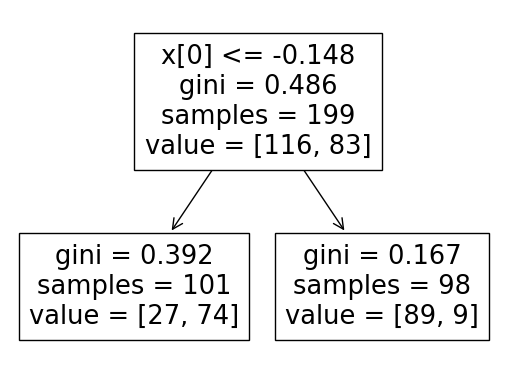

In [117]:
tree.plot_tree(clf_dynamics)

[Text(0.5, 0.75, 'x[0] <= -2.679\ngini = 0.495\nsamples = 199\nvalue = [90, 109]'),
 Text(0.25, 0.25, 'gini = 0.077\nsamples = 75\nvalue = [72, 3]'),
 Text(0.75, 0.25, 'gini = 0.248\nsamples = 124\nvalue = [18, 106]')]

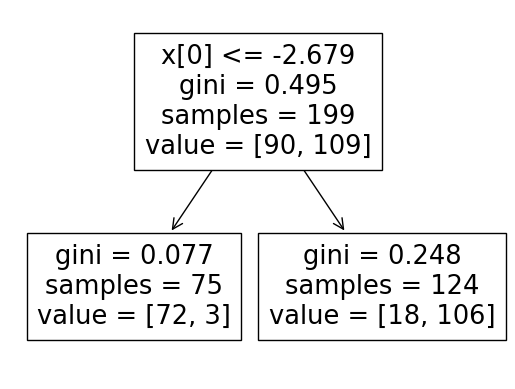

In [118]:
tree.plot_tree(clf_policy)

[Text(0.5, 0.8333333333333334, 'x[1] <= -0.018\ngini = 0.602\nsamples = 199\nvalue = [97, 75, 27]'),
 Text(0.25, 0.5, 'x[2] <= -0.879\ngini = 0.382\nsamples = 114\nvalue = [86, 3, 25]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.159\nsamples = 94\nvalue = [86, 3, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [0, 0, 20]'),
 Text(0.75, 0.5, 'x[0] <= -6.56\ngini = 0.265\nsamples = 85\nvalue = [11, 72, 2]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.062\nsamples = 62\nvalue = [2, 60, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.567\nsamples = 23\nvalue = [9, 12, 2]')]

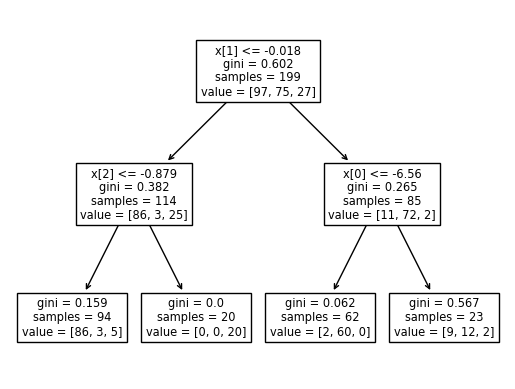

In [119]:
tree.plot_tree(clf_abstract)

[Text(0.5, 0.8333333333333334, 'x[1] <= -1.72\ngini = 0.541\nsamples = 199\nvalue = [39, 124, 36]'),
 Text(0.25, 0.5, 'x[0] <= -3.618\ngini = 0.528\nsamples = 61\nvalue = [32, 2, 27]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.061\nsamples = 32\nvalue = [31, 1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.131\nsamples = 29\nvalue = [1, 1, 27]'),
 Text(0.75, 0.5, 'x[1] <= -0.156\ngini = 0.212\nsamples = 138\nvalue = [7, 122, 9]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.523\nsamples = 42\nvalue = [7, 27, 8]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.021\nsamples = 96\nvalue = [0, 95, 1]')]

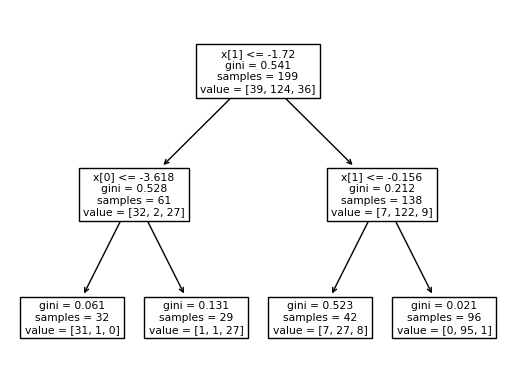

In [120]:
tree.plot_tree(clf_valence)